In [1]:
###Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('default')
#%matplotlib inline

In [2]:
###Load Data

df = pd.read_csv('../data/unlabeled/059-COMBINED-2022-11-9-7-4-48-1667995631-v1.4.3+lucina-buzz.csv', index_col=0)
df.columns

Index(['ts_r', 'acc_x_r', 'acc_y_r', 'acc_z_r', 'temp_r', 'gyr_x_r', 'gyr_y_r',
       'gyr_z_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'kal_status_r', 'alpha_r',
       'beta_r', 'ts_n', 'acc_x_n', 'acc_y_n', 'acc_z_n', 'temp_n', 'gyr_x_n',
       'gyr_y_n', 'gyr_z_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n',
       'alpha_n', 'beta_n'],
      dtype='object')

In [3]:
counter = 1
seconds = 1
sec_list = []

for x in range(len(df)):
    if counter <= 25:
        sec_list.append(seconds)
        counter = counter + 1
    else:
        seconds = seconds + 1
        sec_list.append(seconds)
        counter = 2

df['seconds'] = sec_list

In [4]:
diff_list = []
index = 0

for a in df['alpha_r']:
    diff = a - df.loc[index, 'beta_r']
    diff_list.append(diff)
    index = index + 1

df['ab_r_diff'] = diff_list

In [5]:
acc_x_n = df['acc_x_n'].to_frame()
acc_x_n['sma'] = acc_x_n['acc_x_n'].rolling(125).mean()
acc_x_n['cma'] = acc_x_n['acc_x_n'].expanding().mean()
acc_x_n['ema'] = acc_x_n['acc_x_n'].ewm(span=125).mean()
#acc_x_n.dropna(inplace=True)

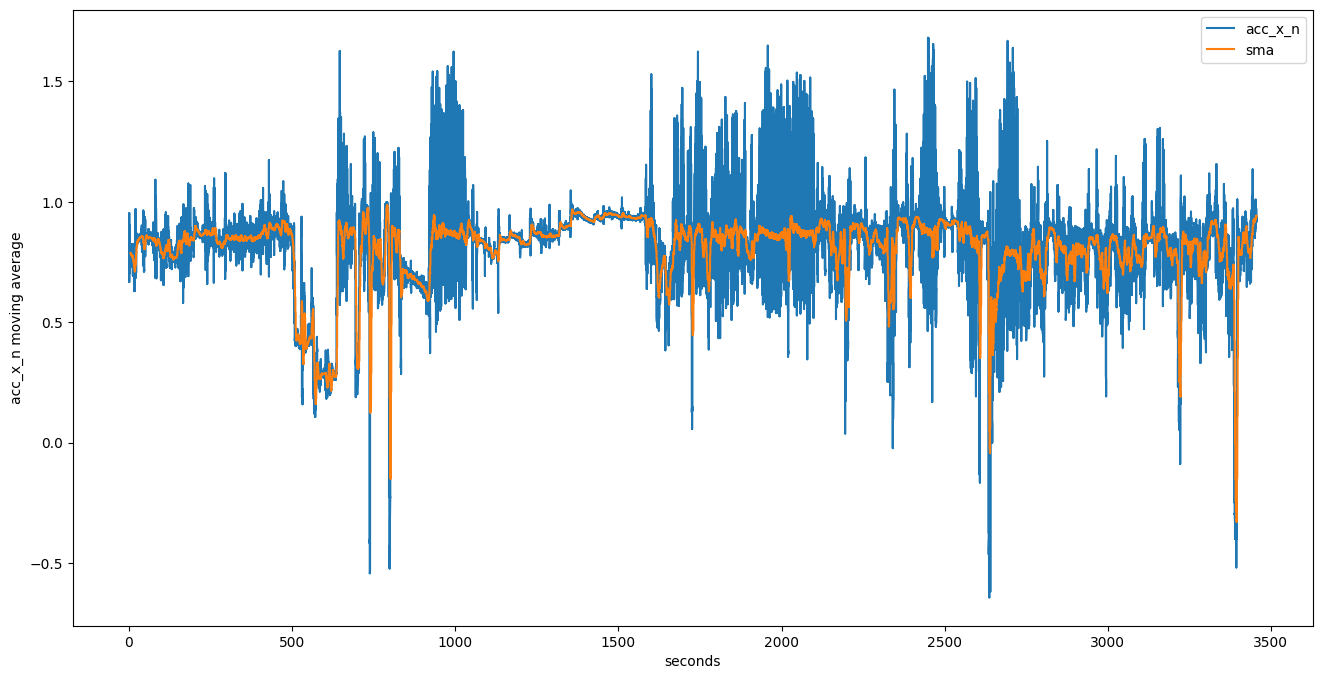

In [15]:
x = sec_list
y = df['acc_x_n']
y1 = acc_x_n['sma']
y2 = acc_x_n['cma']
y3 = acc_x_n['ema']

plt.figure(figsize=(16, 8))

plt.plot(x, y, label='acc_x_n')
plt.plot(x, y1, label='sma')
#plt.plot(x, y2, label='cma')
#plt.plot(x, y3, label='ema')

plt.xlabel('seconds')
plt.ylabel('acc_x_n moving average')
plt.legend()

plt.show()

In [7]:
acc_y_n = df['acc_y_n'].to_frame()
acc_y_n['sma'] = acc_y_n['acc_y_n'].rolling(125).mean()
acc_y_n['cma'] = acc_y_n['acc_y_n'].expanding().mean()
acc_y_n['ema'] = acc_y_n['acc_y_n'].ewm(span=125).mean()
#acc_y_n.dropna(inplace=True)

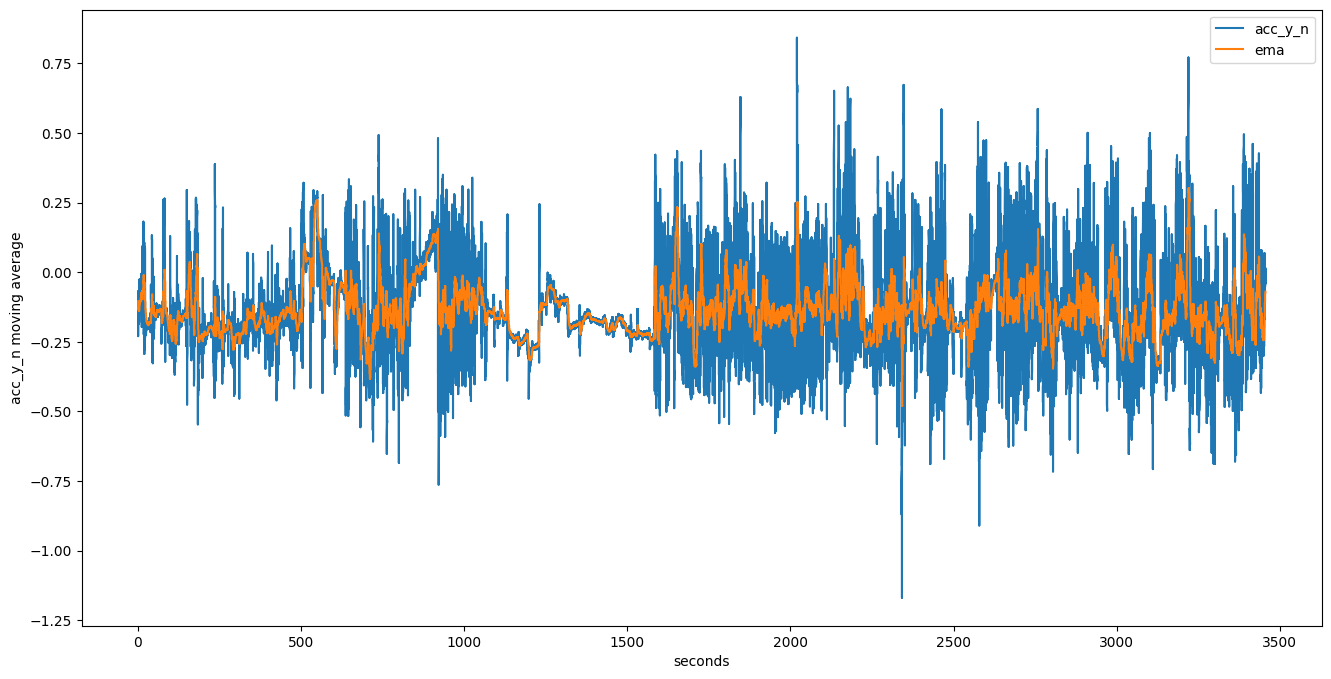

In [8]:
x = sec_list
y = df['acc_y_n']
y1 = acc_y_n['sma']
y2 = acc_y_n['cma']
y3 = acc_y_n['ema']

plt.figure(figsize=(16, 8))

plt.plot(x, y, label='acc_y_n')
#plt.plot(x, y1, label='sma')
#plt.plot(x, y2, label='cma')
plt.plot(x, y3, label='ema')

plt.xlabel('seconds')
plt.ylabel('acc_y_n moving average')
plt.legend()

plt.show()

In [9]:
acc_z_n = df['acc_z_n'].to_frame()
acc_z_n['sma'] = acc_z_n['acc_z_n'].rolling(125).mean()
acc_z_n['cma'] = acc_z_n['acc_z_n'].expanding().mean()
acc_z_n['ema'] = acc_z_n['acc_z_n'].ewm(span=125).mean()
#acc_z_n.dropna(inplace=True)

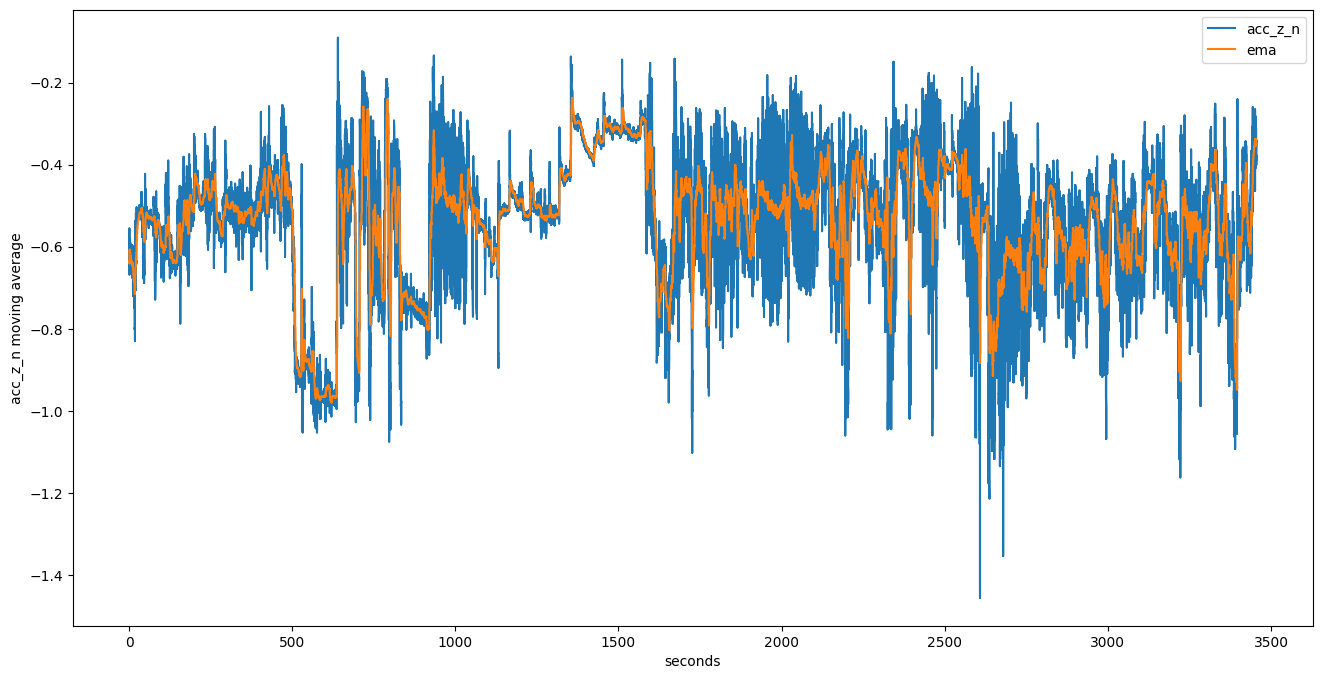

In [10]:
x = sec_list
y = df['acc_z_n']
y1 = acc_z_n['sma']
y2 = acc_z_n['cma']
y3 = acc_z_n['ema']

plt.figure(figsize=(16, 8))

plt.plot(x, y, label='acc_z_n')
#plt.plot(x, y1, label='sma')
#plt.plot(x, y2, label='cma')
plt.plot(x, y3, label='ema')

plt.xlabel('seconds')
plt.ylabel('acc_z_n moving average')
plt.legend()

plt.show()

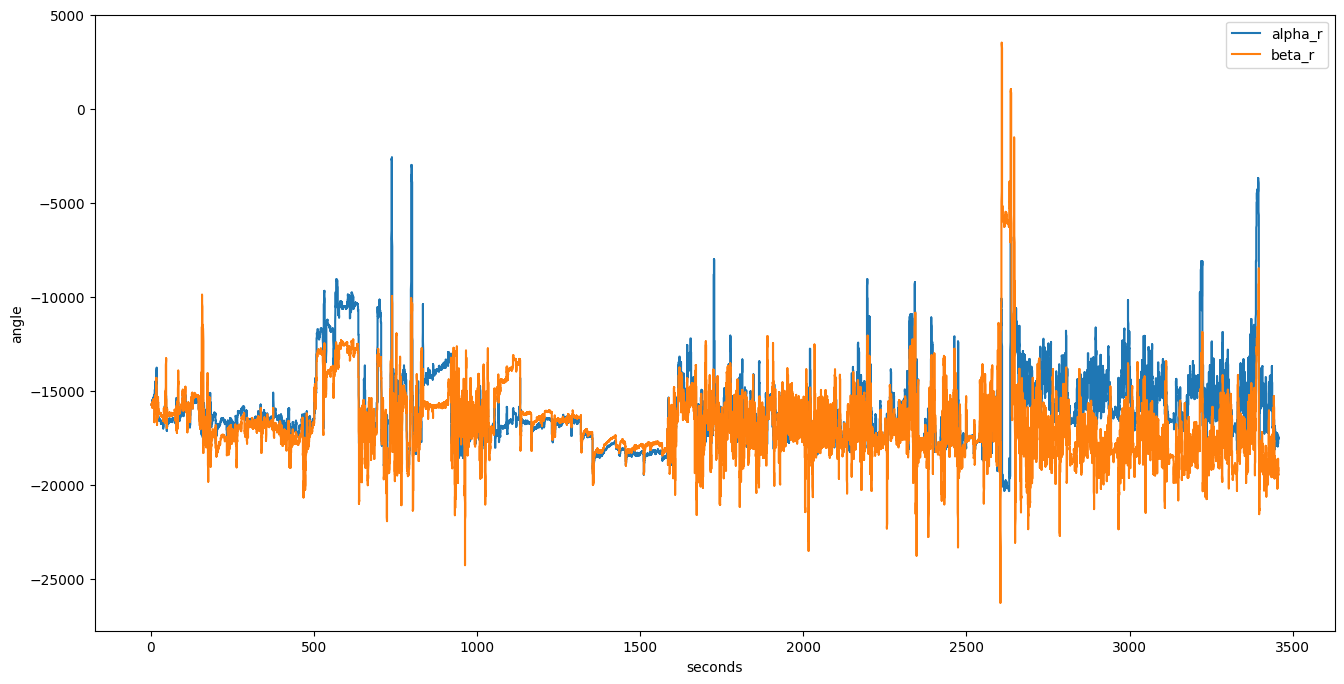

In [12]:
x = sec_list
y1 = df['alpha_r']
y2 = df['beta_r']

plt.figure(figsize=(16, 8))

plt.plot(x, y1, label='alpha_r')
plt.plot(x, y2, label='beta_r')

plt.xlabel('seconds')
plt.ylabel('angle')
plt.legend()

plt.show()